In [ ]:
import matplotlib.pyplot as plt

import numpy as np

from keras.layers import Input, Conv2D, MaxPooling2D, UpSampling2D
from keras.layers import Dropout, Flatten, Dense
from keras.models import Model

In [ ]:
#===============================================
#  Simple routine to show a pair of images
#===============================================
def show_image_pair(_ima1, _ima2):
    fig, axes = plt.subplots(nrows=1, ncols=2)
    ax = axes.ravel()
    ax[0].imshow(_ima1, cmap='gray')
    ax[1].imshow(_ima2, cmap='gray')
    ax[0].axis('off')
    ax[1].axis('off')
    plt.tight_layout()
    plt.show()

In [ ]:
#===============================================
#   Definicion de la red neuronal
#===============================================

#--- Definimos una entrada del mismo tama#o que las imagenes de MNIST
input_img = Input(shape=(None, None,3))

#--- Codificador. Filtra la imagen de entrada reduciendo la resolucion en cada capa (MaxPooling2D)
x0 = Conv2D(32, (3,3), activation='relu', padding='same')(input_img) # - (64 x 64) x 32  28x16 pesos
x1 = MaxPooling2D((2, 2), padding='same')(x0) # 32 x 32 x 32

x2 = Conv2D(64, (3, 3), activation='relu', padding='same')(x1)  # (32 x 32) x 64 
x = MaxPooling2D((2, 2), padding='same')(x2)  # 16 x 16 x 64

x = Conv2D(128, (3, 3), activation='relu', padding='same')(x) # (16 x 16) x 128
x = MaxPooling2D((2, 2), padding='same')(x) # (8 x 8) x 128

#--- Code at the bottleneck
code = Conv2D(128, (3, 3), activation='relu', padding='same', name='bottleneck')(x)

x = UpSampling2D((2, 2))(code) # (16 x 16) x 128
x = Conv2D(64, (3, 3), activation='relu', padding='same')(x) # (16 x 16) x 64

x = UpSampling2D((2, 2))(x) # (32 x 32) x 64
x = Conv2D(32, (3, 3), activation='relu', padding='same')(x) # 32 x 32 x 32

x = UpSampling2D((2, 2))(x) # (64 x 64) x 32
xf = Conv2D(3, (3, 3), activation='linear', padding='same')(x) #  (64 x 64) x 3

#--- Definimos el modelo y lo compilamos
autoencoder = Model(input_img, xf)
autoencoder.compile(optimizer='adadelta', loss='mse') # mean( (ima_out - ima_in)^2) 

autoencoder.summary()

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, None, None, 3)]   0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, None, None, 32)    896       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, None, None, 32)    0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, None, None, 64)    18496     
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, None, None, 64)    0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, None, None, 128)   73856     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, None, None, 128)   0   

In [ ]:
def add_noise(_imas, _noise_level):
  _out = []
  ng = _imas[0].shape[0]
  #print(ng)

  for ima_i in _imas:
    _out.append(ima_i + np.random.uniform(0,_noise_level,(ng,ng,3)))

  #return _out
  return np.asarray(_out)


In [ ]:
def crop_images(_imas):
  imas = []
  for i in range(_imas.shape[0]):
    imas.append(_imas[0, 64-32:64+32,64-32:64+32,:])
  return np.asarray(imas)

In [ ]:
X1 = crop_images(np.load('/content/drive/MyDrive/Cursos/cosmo-late.npy'))
X2 = crop_images(np.load('/content/drive/MyDrive/Cursos/cosmo-early.npy'))

In [ ]:
X1.shape

(301, 64, 64, 3)

In [ ]:
#--- Concatenate early and late sets. Simple pre-processing
X = np.concatenate((X1,X2), axis=0).astype(np.float32)/256.0 

#--- Get random indexes
rand_ind = ( np.arange(0,X.shape[0]) ) 
np.random.shuffle(rand_ind)

#--- Shuffle data
X = X[rand_ind]

In [ ]:
#--- Define training and test datasets
Y_train = X[50:]
Y_test  = X[0:50]


In [ ]:
X_train = add_noise(Y_train, 0.2)
X_test  = add_noise(Y_test, 0.2)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


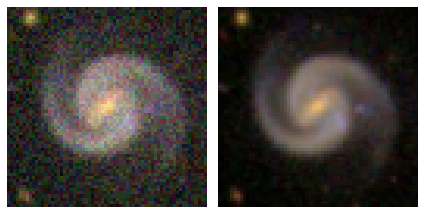

In [ ]:
show_image_pair(X_train[0], Y_train[0])

2.7884606508266073e-07

Epoch 1/100
9/9 [==============================] - 0s 31ms/step - loss: 0.0174
Epoch 2/100
9/9 [==============================] - 0s 21ms/step - loss: 0.0172
Epoch 3/100
9/9 [==============================] - 0s 19ms/step - loss: 0.0169
Epoch 4/100
9/9 [==============================] - 0s 20ms/step - loss: 0.0167
Epoch 5/100
9/9 [==============================] - 0s 20ms/step - loss: 0.0164
Epoch 6/100
9/9 [==============================] - 0s 20ms/step - loss: 0.0162
Epoch 7/100
9/9 [==============================] - 0s 19ms/step - loss: 0.0159
Epoch 8/100
9/9 [==============================] - 0s 19ms/step - loss: 0.0157
Epoch 9/100
9/9 [==============================] - 0s 20ms/step - loss: 0.0154
Epoch 10/100
9/9 [==============================] - 0s 21ms/step - loss: 0.0152
Epoch 11/100
9/9 [==============================] - 0s 20ms/step - loss: 0.0150
Epoch 12/100
9/9 [==============================] - 0s 20ms/step - loss: 0.0147
Epoch 13/100
9/9 [==============================]

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


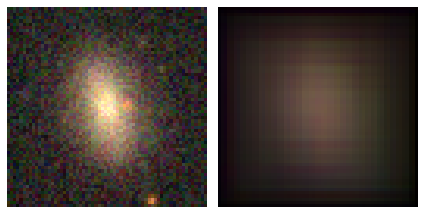

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


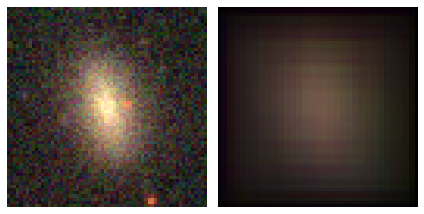

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


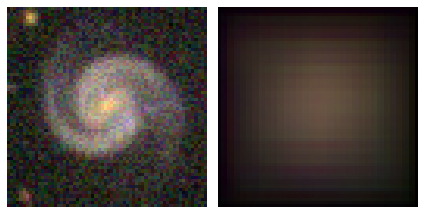

Epoch 1/100
9/9 [==============================] - 0s 28ms/step - loss: 0.0085
Epoch 2/100
9/9 [==============================] - 0s 21ms/step - loss: 0.0084
Epoch 3/100
9/9 [==============================] - 0s 20ms/step - loss: 0.0084
Epoch 4/100
9/9 [==============================] - 0s 20ms/step - loss: 0.0084
Epoch 5/100
9/9 [==============================] - 0s 20ms/step - loss: 0.0084
Epoch 6/100
9/9 [==============================] - 0s 20ms/step - loss: 0.0084
Epoch 7/100
9/9 [==============================] - 0s 20ms/step - loss: 0.0084
Epoch 8/100
9/9 [==============================] - 0s 21ms/step - loss: 0.0084
Epoch 9/100
9/9 [==============================] - 0s 20ms/step - loss: 0.0083
Epoch 10/100
9/9 [==============================] - 0s 20ms/step - loss: 0.0083
Epoch 11/100
9/9 [==============================] - 0s 21ms/step - loss: 0.0083
Epoch 12/100
9/9 [==============================] - 0s 21ms/step - loss: 0.0083
Epoch 13/100
9/9 [==============================]

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


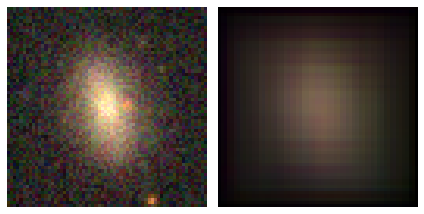

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


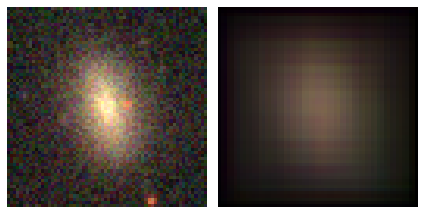

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


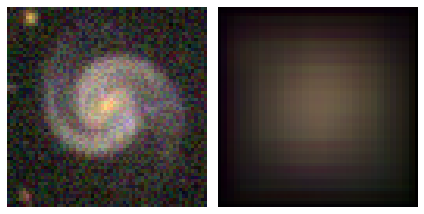

Epoch 1/100
9/9 [==============================] - 0s 29ms/step - loss: 0.0072
Epoch 2/100
9/9 [==============================] - 0s 22ms/step - loss: 0.0072
Epoch 3/100
9/9 [==============================] - 0s 21ms/step - loss: 0.0071
Epoch 4/100
9/9 [==============================] - 0s 20ms/step - loss: 0.0071
Epoch 5/100
9/9 [==============================] - 0s 22ms/step - loss: 0.0071
Epoch 6/100
9/9 [==============================] - 0s 20ms/step - loss: 0.0071
Epoch 7/100
9/9 [==============================] - 0s 21ms/step - loss: 0.0071
Epoch 8/100
9/9 [==============================] - 0s 21ms/step - loss: 0.0071
Epoch 9/100
9/9 [==============================] - 0s 20ms/step - loss: 0.0071
Epoch 10/100
9/9 [==============================] - 0s 22ms/step - loss: 0.0071
Epoch 11/100
9/9 [==============================] - 0s 20ms/step - loss: 0.0071
Epoch 12/100
9/9 [==============================] - 0s 21ms/step - loss: 0.0070
Epoch 13/100
9/9 [==============================]

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


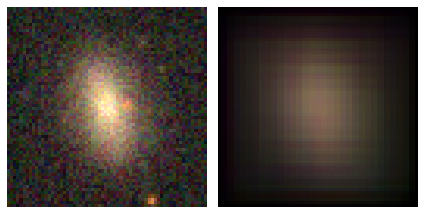

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


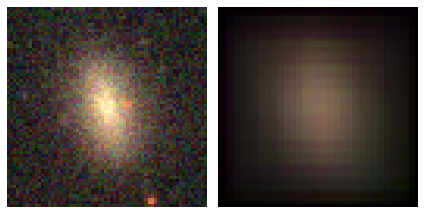

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


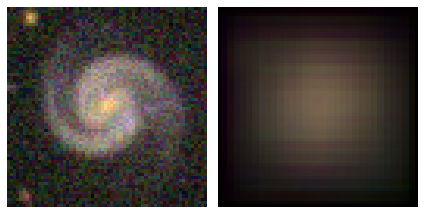

Epoch 1/100
9/9 [==============================] - 0s 20ms/step - loss: 0.0061
Epoch 2/100
9/9 [==============================] - 0s 21ms/step - loss: 0.0061
Epoch 3/100
9/9 [==============================] - 0s 21ms/step - loss: 0.0061
Epoch 4/100
9/9 [==============================] - 0s 20ms/step - loss: 0.0061
Epoch 5/100
9/9 [==============================] - 0s 23ms/step - loss: 0.0061
Epoch 6/100
9/9 [==============================] - 0s 21ms/step - loss: 0.0061
Epoch 7/100
9/9 [==============================] - 0s 20ms/step - loss: 0.0060
Epoch 8/100
9/9 [==============================] - 0s 20ms/step - loss: 0.0060
Epoch 9/100
9/9 [==============================] - 0s 21ms/step - loss: 0.0060
Epoch 10/100
9/9 [==============================] - 0s 20ms/step - loss: 0.0060
Epoch 11/100
9/9 [==============================] - 0s 20ms/step - loss: 0.0060
Epoch 12/100
9/9 [==============================] - 0s 21ms/step - loss: 0.0060
Epoch 13/100
9/9 [==============================]

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


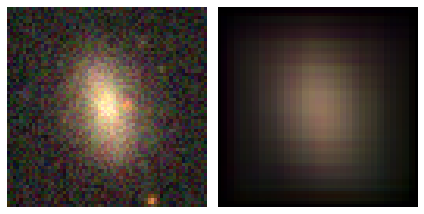

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


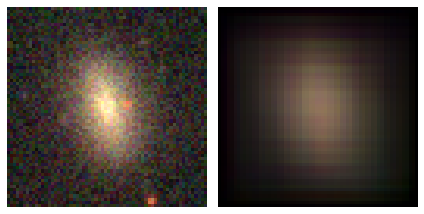

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


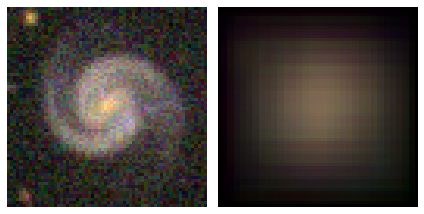

Epoch 1/100
9/9 [==============================] - 0s 20ms/step - loss: 0.0053
Epoch 2/100
9/9 [==============================] - 0s 21ms/step - loss: 0.0053
Epoch 3/100
9/9 [==============================] - 0s 20ms/step - loss: 0.0053
Epoch 4/100
9/9 [==============================] - 0s 22ms/step - loss: 0.0053
Epoch 5/100
9/9 [==============================] - 0s 21ms/step - loss: 0.0052
Epoch 6/100
9/9 [==============================] - 0s 22ms/step - loss: 0.0052
Epoch 7/100
9/9 [==============================] - 0s 20ms/step - loss: 0.0052
Epoch 8/100
9/9 [==============================] - 0s 21ms/step - loss: 0.0052
Epoch 9/100
9/9 [==============================] - 0s 21ms/step - loss: 0.0052
Epoch 10/100
9/9 [==============================] - 0s 20ms/step - loss: 0.0052
Epoch 11/100
9/9 [==============================] - 0s 21ms/step - loss: 0.0052
Epoch 12/100
9/9 [==============================] - 0s 21ms/step - loss: 0.0052
Epoch 13/100
9/9 [==============================]

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


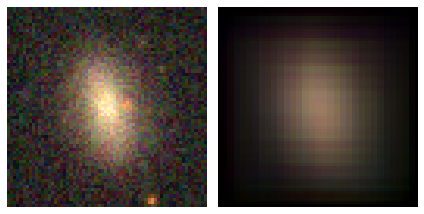

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


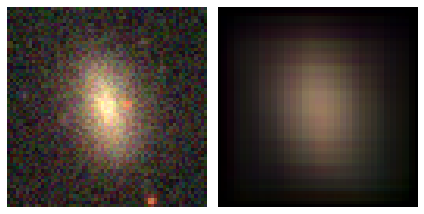

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


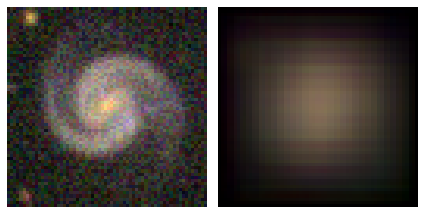

Epoch 1/100
9/9 [==============================] - 0s 22ms/step - loss: 0.0047
Epoch 2/100
9/9 [==============================] - 0s 20ms/step - loss: 0.0046
Epoch 3/100
9/9 [==============================] - 0s 22ms/step - loss: 0.0046
Epoch 4/100
9/9 [==============================] - 0s 22ms/step - loss: 0.0046
Epoch 5/100
9/9 [==============================] - 0s 22ms/step - loss: 0.0046
Epoch 6/100
9/9 [==============================] - 0s 21ms/step - loss: 0.0046
Epoch 7/100
9/9 [==============================] - 0s 22ms/step - loss: 0.0046
Epoch 8/100
9/9 [==============================] - 0s 21ms/step - loss: 0.0046
Epoch 9/100
9/9 [==============================] - 0s 22ms/step - loss: 0.0046
Epoch 10/100
9/9 [==============================] - 0s 23ms/step - loss: 0.0046
Epoch 11/100
9/9 [==============================] - 0s 24ms/step - loss: 0.0046
Epoch 12/100
9/9 [==============================] - 0s 21ms/step - loss: 0.0046
Epoch 13/100
9/9 [==============================]

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


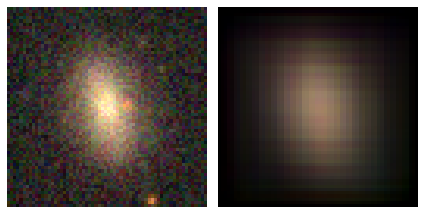

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


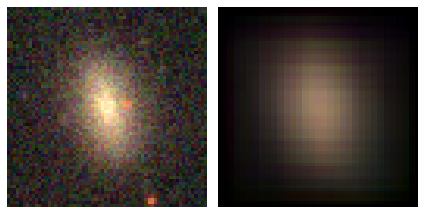

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


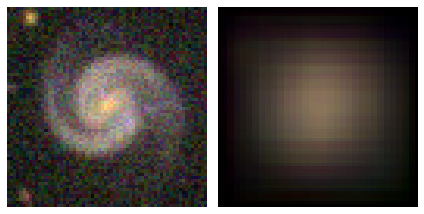

Epoch 1/100
9/9 [==============================] - 0s 21ms/step - loss: 0.0042
Epoch 2/100
9/9 [==============================] - 0s 22ms/step - loss: 0.0042
Epoch 3/100
9/9 [==============================] - 0s 22ms/step - loss: 0.0042
Epoch 4/100
9/9 [==============================] - 0s 23ms/step - loss: 0.0042
Epoch 5/100
9/9 [==============================] - 0s 21ms/step - loss: 0.0042
Epoch 6/100
9/9 [==============================] - 0s 22ms/step - loss: 0.0042
Epoch 7/100
9/9 [==============================] - 0s 22ms/step - loss: 0.0042
Epoch 8/100
9/9 [==============================] - 0s 21ms/step - loss: 0.0042
Epoch 9/100
9/9 [==============================] - 0s 20ms/step - loss: 0.0042
Epoch 10/100
9/9 [==============================] - 0s 25ms/step - loss: 0.0042
Epoch 11/100
9/9 [==============================] - 0s 23ms/step - loss: 0.0042
Epoch 12/100
9/9 [==============================] - 0s 21ms/step - loss: 0.0042
Epoch 13/100
9/9 [==============================]

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


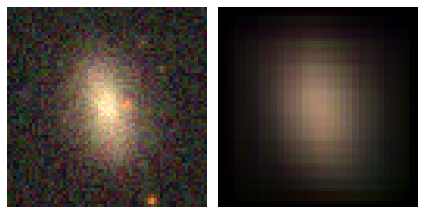

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


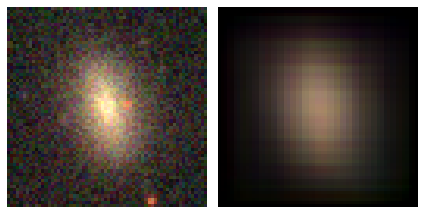

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


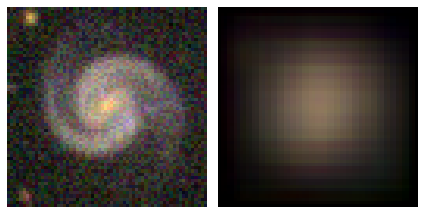

Epoch 1/100
9/9 [==============================] - 0s 24ms/step - loss: 0.0039
Epoch 2/100
9/9 [==============================] - 0s 23ms/step - loss: 0.0039
Epoch 3/100
9/9 [==============================] - 0s 22ms/step - loss: 0.0039
Epoch 4/100
9/9 [==============================] - 0s 21ms/step - loss: 0.0039
Epoch 5/100
9/9 [==============================] - 0s 21ms/step - loss: 0.0039
Epoch 6/100
9/9 [==============================] - 0s 22ms/step - loss: 0.0039
Epoch 7/100
9/9 [==============================] - 0s 22ms/step - loss: 0.0039
Epoch 8/100
9/9 [==============================] - 0s 22ms/step - loss: 0.0039
Epoch 9/100
9/9 [==============================] - 0s 23ms/step - loss: 0.0038
Epoch 10/100
9/9 [==============================] - 0s 22ms/step - loss: 0.0038
Epoch 11/100
9/9 [==============================] - 0s 22ms/step - loss: 0.0038
Epoch 12/100
9/9 [==============================] - 0s 24ms/step - loss: 0.0038
Epoch 13/100
9/9 [==============================]

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


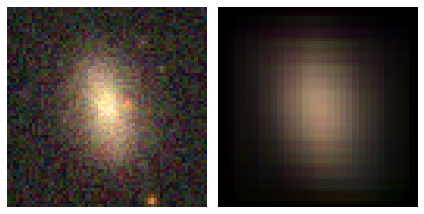

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


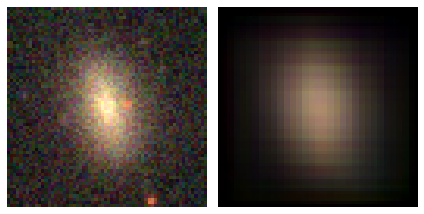

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


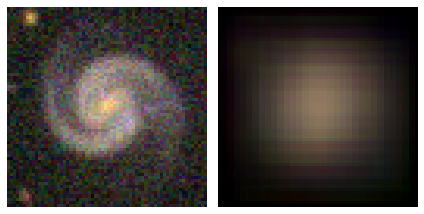

Epoch 1/100
9/9 [==============================] - 0s 21ms/step - loss: 0.0036
Epoch 2/100
9/9 [==============================] - 0s 21ms/step - loss: 0.0036
Epoch 3/100
9/9 [==============================] - 0s 23ms/step - loss: 0.0036
Epoch 4/100
9/9 [==============================] - 0s 22ms/step - loss: 0.0036
Epoch 5/100
9/9 [==============================] - 0s 22ms/step - loss: 0.0036
Epoch 6/100
9/9 [==============================] - 0s 23ms/step - loss: 0.0036
Epoch 7/100
9/9 [==============================] - 0s 21ms/step - loss: 0.0036
Epoch 8/100
9/9 [==============================] - 0s 21ms/step - loss: 0.0036
Epoch 9/100
9/9 [==============================] - 0s 21ms/step - loss: 0.0036
Epoch 10/100
9/9 [==============================] - 0s 21ms/step - loss: 0.0036
Epoch 11/100
9/9 [==============================] - 0s 21ms/step - loss: 0.0036
Epoch 12/100
9/9 [==============================] - 0s 21ms/step - loss: 0.0036
Epoch 13/100
9/9 [==============================]

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


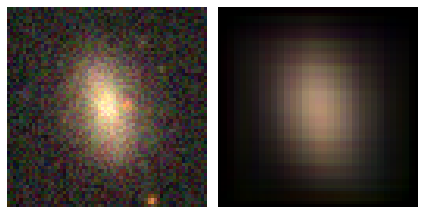

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


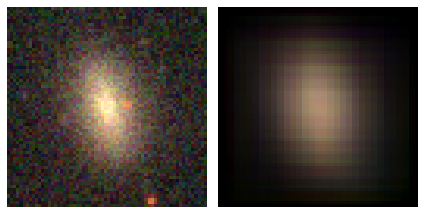

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


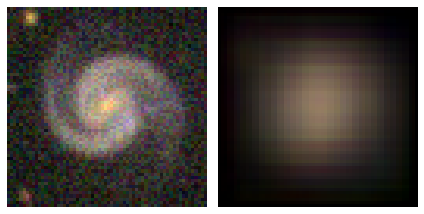

Epoch 1/100
9/9 [==============================] - 0s 21ms/step - loss: 0.0034
Epoch 2/100
9/9 [==============================] - 0s 25ms/step - loss: 0.0034
Epoch 3/100
9/9 [==============================] - 0s 22ms/step - loss: 0.0034
Epoch 4/100
9/9 [==============================] - 0s 21ms/step - loss: 0.0034
Epoch 5/100
9/9 [==============================] - 0s 23ms/step - loss: 0.0034
Epoch 6/100
9/9 [==============================] - 0s 24ms/step - loss: 0.0034
Epoch 7/100
9/9 [==============================] - 0s 22ms/step - loss: 0.0034
Epoch 8/100
9/9 [==============================] - 0s 22ms/step - loss: 0.0034
Epoch 9/100
9/9 [==============================] - 0s 23ms/step - loss: 0.0034
Epoch 10/100
9/9 [==============================] - 0s 23ms/step - loss: 0.0034
Epoch 11/100
9/9 [==============================] - 0s 22ms/step - loss: 0.0034
Epoch 12/100
9/9 [==============================] - 0s 22ms/step - loss: 0.0034
Epoch 13/100
9/9 [==============================]

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


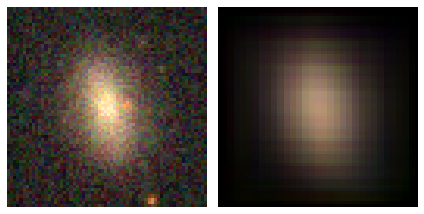

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


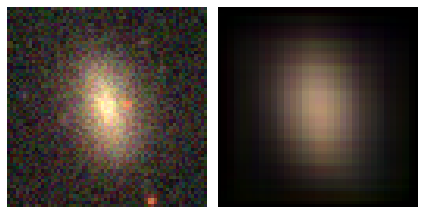

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


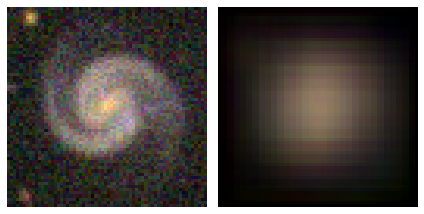

In [ ]:
#--- Entrenamiento de la red neuronal. 

for i in range(10):
  autoencoder.fit(X_train, Y_train, 
  epochs=100,         #--- Numero de "repasadas" que la red va a dar a los datos
  batch_size=64,     #--- Cuantas imagenes pasamos en cada iteracion
  shuffle=True)      #--- Cada epoca reordenamos los datos de forma aleatoria

  X_pred = autoencoder.predict(X_test[0:10])

  show_image_pair(X_test[0], np.power(X_pred[0], 1))
  show_image_pair(X_test[1], np.power(X_pred[1], 1))
  show_image_pair(X_test[2], np.power(X_pred[2], 1))